# Synthesis Data Visualization

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable

import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import MultipleLocator, MaxNLocator, LinearLocator
import seaborn as sns
import os
import random
from pathlib import Path
import sys
import datetime
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

- Data loading

In [3]:
fqe_est_obj_0 = np.load('../model_output/data_output/neural network_fqe_est_obj_20250508_v0.npy')
# fqe_est_obj_1 = np.load('../model_output/data_output/linear_fqe_est_obj_20250404_v0.npy')
# fqe_est_obj_2 = np.load('../model_output/data_output/linear_fqe_est_obj_20250331_v0.npy')
# fqe_est_obj_3 = np.load('../model_output/data_output/linear_fqe_est_obj_20250406_v3.npy')

In [4]:
fqe_est_con_rr_0 = np.load('../model_output/data_output/neural network_fqe_est_con_rr_20250508_v0.npy')
# fqe_est_con_rr_1 = np.load('../model_output/data_output/linear_fqe_est_con_rr_20250404_v0.npy')
# fqe_est_con_rr_2 = np.load('../model_output/data_output/linear_fqe_est_con_rr_20250331_v0.npy')
# fqe_est_con_rr_3 = np.load('../model_output/data_output/linear_fqe_est_con_rr_20250406_v3.npy')

In [5]:
fqe_est_con_los_0 = np.load('../model_output/data_output/neural network_fqe_est_con_los_20250508_v0.npy')
# fqe_est_con_los_1 = np.load('../model_output/data_output/linear_fqe_est_con_los_20250404_v0.npy')
# fqe_est_con_los_2 = np.load('../model_output/data_output/linear_fqe_est_con_los_20250331_v0.npy')
# fqe_est_con_los_3 = np.load('../model_output/data_output/linear_fqe_est_con_los_20250406_v3.npy')

In [6]:
lambda_con_rr_0 = np.load('../model_output/data_output/neural network_lambda_rr_20250508_v0.npy')
# lambda_con_rr_1 = np.load('../model_output/data_output/linear_lambda_rr_20250404_v0.npy')
# lambda_con_rr_2 = np.load('../model_output/data_output/linear_lambda_rr_20250331_v0.npy')
# lambda_con_rr_3 = np.load('../model_output/data_output/linear_lambda_rr_20250406_v3.npy')

In [7]:
lambda_con_los_0 = np.load('../model_output/data_output/neural network_lambda_los_20250508_v0.npy')
# lambda_con_los_1 = np.load('../model_output/data_output/linear_lambda_los_20250404_v0.npy')
# lambda_con_los_2 = np.load('../model_output/data_output/linear_lambda_los_20250331_v0.npy')
# lambda_con_los_3 = np.load('../model_output/data_output/linear_lambda_los_20250406_v3.npy')

- Synthesis visualization

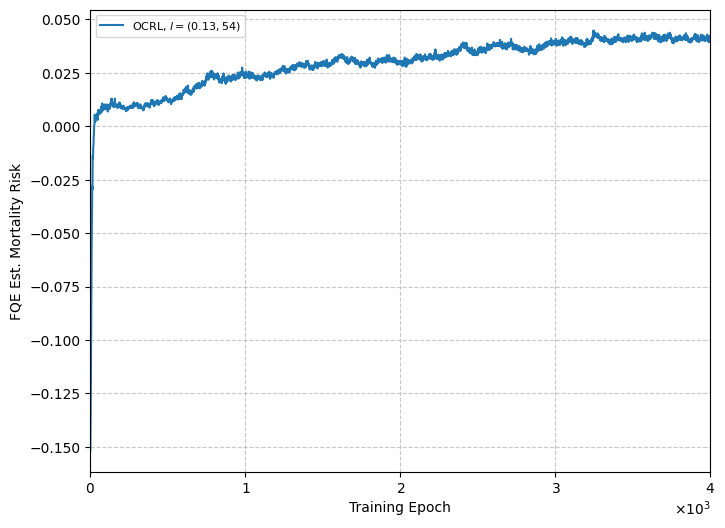

In [11]:
plt.figure(figsize = (8, 6))

plt.plot(fqe_est_obj_0, label = r'OCRL, $l = (0.13, 54)$')
# plt.plot(fqe_est_obj_1, label = r'OCRL, $l = (0.13, 60)$')
# plt.plot(fqe_est_obj_2, label = r'OCRL, $l = (0.13, 54)$')
# plt.plot(fqe_est_obj_3, label = r'OCRL, $l = (0.13, 48)$')

plt.xlabel("Training Epoch")
plt.ylabel("FQE Est. Mortality Risk")

# Configure x-axis to use scientific notation
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1000))
ax.ticklabel_format(axis = 'x', style = 'sci', scilimits = (0,0))

# Ensure x-axis extends to maximum epoch value
# max_epoch = max(len(fqe_est_obj_0), len(fqe_est_obj_1), 
#                 len(fqe_est_obj_2), len(fqe_est_obj_3))
# plt.xlim(0, max_epoch)
plt.xlim(0, 4000)

# Format the exponent text
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0,0))
ax.xaxis.set_major_formatter(formatter)

plt.legend(prop = {'size': 8})
plt.grid(True, linestyle = '--', alpha = 0.7)

# plt.savefig("../Experiment Figure/syn_linear_fqe_obj_est_value_20250407.png", 
#             dpi = 300, 
#             bbox_inches = 'tight')

plt.savefig("../Experiment Figure/NN_fqe_obj_est_value_20250508.png", 
            dpi = 400, 
            bbox_inches = 'tight')

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fqe_est_con_rr_0, label=r'OCRL, $l = (0.13, 66)$')
plt.plot(fqe_est_con_rr_1, label=r'OCRL, $l = (0.13, 60)$')
plt.plot(fqe_est_con_rr_2, label=r'OCRL, $l = (0.13, 54)$')
plt.plot(fqe_est_con_rr_3, label=r'OCRL, $l = (0.13, 48)$')

plt.axhline(y=0.13, color='gray', linestyle='--', linewidth=2.0, 
           label=r'Constraint Threshold ($l_{rr} = 0.13$)')

plt.annotate('Readmission Risk Threshold', 
            xy=(max_epoch*0.75, 0.13), 
            xytext=(max_epoch*0.75, 0.17),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
            fontsize=10,
            color='gray',
            fontweight='bold')

plt.xlabel("Training Epoch")
plt.ylabel("FQE Est. Readmission Risk")

# Configure x-axis to use scientific notation
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2000))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

# Ensure x-axis extends to maximum epoch value
max_epoch = max(len(fqe_est_obj_0), len(fqe_est_obj_1), 
                len(fqe_est_obj_2), len(fqe_est_obj_3))
# plt.xlim(0, max_epoch)
plt.xlim(0, 8000)

# Format the exponent text
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0,0))
ax.xaxis.set_major_formatter(formatter)

plt.ylim(0.1, 0.35)  

plt.axhspan(0.13, plt.ylim()[1], alpha=0.1, color='gray')

plt.legend(prop={'size': 8}, loc='upper right')

plt.grid(True, linestyle='--', alpha=0.7)

# plt.savefig("../Experiment Figure/syn_linear_fqe_con_rr_est_value_20250407.png", 
#             dpi=300, 
#             bbox_inches='tight')

plt.savefig("../Experiment Figure/NN_fqe_con_rr_est_value_20250508.png", 
            dpi=300, 
            bbox_inches='tight')

plt.show()

In [ ]:
plt.figure(figsize = (8, 6))

plt.plot(fqe_est_con_los_0 * 12, label = r'OCRL, $l = (0.13, 66)$')
plt.plot(fqe_est_con_los_1 * 12, label = r'OCRL, $l = (0.13, 60)$')
plt.plot(fqe_est_con_los_2 * 12, label = r'OCRL, $l = (0.13, 54)$')
plt.plot(fqe_est_con_los_3 * 12, label = r'OCRL, $l = (0.13, 48)$')

plt.xlabel("Training Epoch")
plt.ylabel("FQE Est. Length-of-Stay (hrs)")

# Configure x-axis to use scientific notation
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2000))
ax.ticklabel_format(axis = 'x', style = 'sci', scilimits = (0,0))

# Ensure x-axis extends to maximum epoch value
max_epoch = max(len(fqe_est_obj_0), len(fqe_est_obj_1), 
                len(fqe_est_obj_2), len(fqe_est_obj_3))
# plt.xlim(0, max_epoch)
plt.xlim(0, 8000)

# Format the exponent text
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0,0))
ax.xaxis.set_major_formatter(formatter)

plt.legend(prop = {'size': 8})
plt.grid(True, linestyle = '--', alpha = 0.7)

# plt.savefig("../Experiment Figure/syn_linear_fqe_con_los_value_20250407.png", 
#             dpi = 300, 
#             bbox_inches = 'tight')

plt.savefig("../Experiment Figure/NN_fqe_con_los_value_20250508.png", 
            dpi = 300, 
            bbox_inches = 'tight')

plt.show()

In [ ]:
plt.figure(figsize = (8, 6))

plt.plot(lambda_con_rr_0, label = r'OCRL, $l = (0.13, 66)$')
plt.plot(lambda_con_rr_1, label = r'OCRL, $l = (0.13, 60)$')
plt.plot(lambda_con_rr_2, label = r'OCRL, $l = (0.13, 54)$')
plt.plot(lambda_con_rr_3, label = r'OCRL, $l = (0.13, 48)$')

plt.title(r"Training Process of Lagrangian Multiplier $\lambda$")
plt.xlabel("Training Epoch")
ylabel = plt.ylabel(r"$\lambda$")
ylabel.set_rotation(0)

# Configure x-axis to use scientific notation
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2000))
ax.ticklabel_format(axis = 'x', style = 'sci', scilimits = (0,0))

# Ensure x-axis extends to maximum epoch value
max_epoch = max(len(fqe_est_obj_0), len(fqe_est_obj_1), 
                len(fqe_est_obj_2), len(fqe_est_obj_3))
# plt.xlim(0, max_epoch)
plt.xlim(0, 8000)

# Format the exponent text
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0,0))
ax.xaxis.set_major_formatter(formatter)

plt.legend(prop = {'size': 8})
plt.grid(True, linestyle = '--', alpha = 0.7)

# plt.savefig("../Experiment Figure/syn_linear_lambda_rr_20250407.png", 
#             dpi = 300, 
#             bbox_inches = 'tight')

plt.savefig("../Experiment Figure/NN_lambda_rr_20250508.png", 
            dpi = 300, 
            bbox_inches = 'tight')

plt.show()

In [ ]:
plt.figure(figsize = (8, 6))

plt.plot(lambda_con_los_0, label = r'OCRL, $l = (0.13, 66)$')
plt.plot(lambda_con_los_1, label = r'OCRL, $l = (0.13, 60)$')
plt.plot(lambda_con_los_2, label = r'OCRL, $l = (0.13, 54)$')
plt.plot(lambda_con_los_3, label = r'OCRL, $l = (0.13, 48)$')

plt.title(r"Training Process of Lagrangian Multiplier $\lambda$")
plt.xlabel("Training Epoch")
ylabel = plt.ylabel(r"$\lambda$")
ylabel.set_rotation(0)

# Configure x-axis to use scientific notation
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2000))
ax.ticklabel_format(axis = 'x', style = 'sci', scilimits = (0,0))

# Ensure x-axis extends to maximum epoch value
max_epoch = max(len(fqe_est_obj_0), len(fqe_est_obj_1), 
                len(fqe_est_obj_2), len(fqe_est_obj_3))
# plt.xlim(0, max_epoch)
plt.xlim(0, 8000)

# Format the exponent text
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0,0))
ax.xaxis.set_major_formatter(formatter)

plt.legend(prop = {'size': 8})
plt.grid(True, linestyle = '--', alpha = 0.7)

# plt.savefig("../Experiment Figure/syn_linear_lambda_los_20250407.png", 
#             dpi = 300, 
#             bbox_inches = 'tight')

plt.savefig("../Experiment Figure/NN_lambda_los_20250508.png", 
            dpi = 300, 
            bbox_inches = 'tight')

plt.show()